# Customer Segmentation Using Clustering

 Import Libraries and Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [4]:
# Load dataset
df = pd.read_csv("/content/Mall_Customers.csv")
df.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Exploratory Data Analysis (EDA)

a. Basic Info

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


b. Univariate & Bivariate Analysis

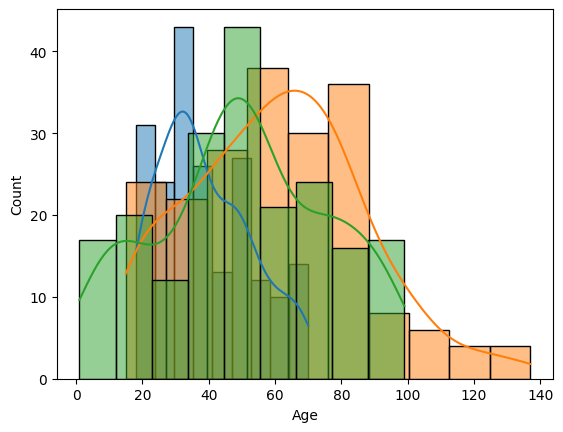

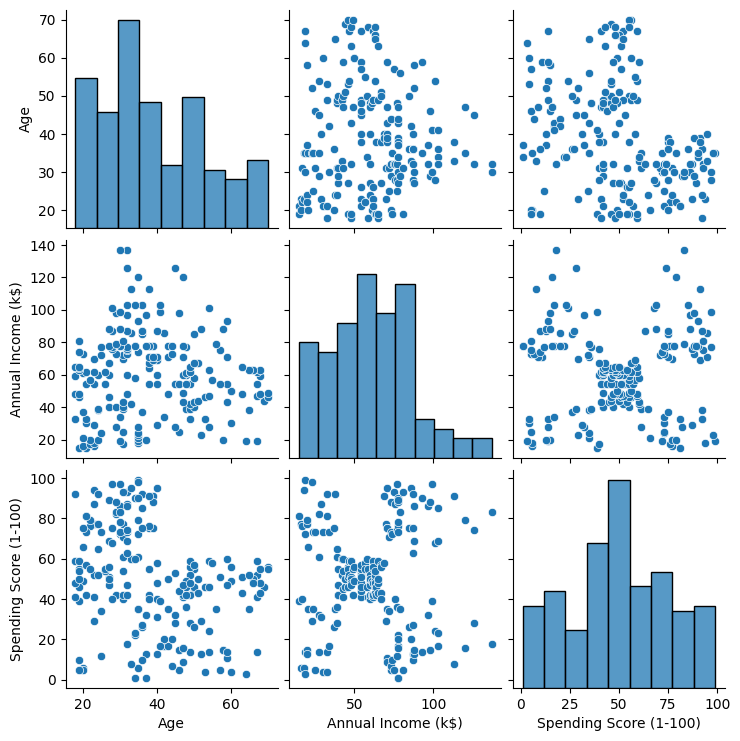

In [6]:
sns.histplot(df['Age'], kde=True)
sns.histplot(df['Annual Income (k$)'], kde=True)
sns.histplot(df['Spending Score (1-100)'], kde=True)
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


c. Gender Distribution

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


<Axes: xlabel='Genre', ylabel='count'>

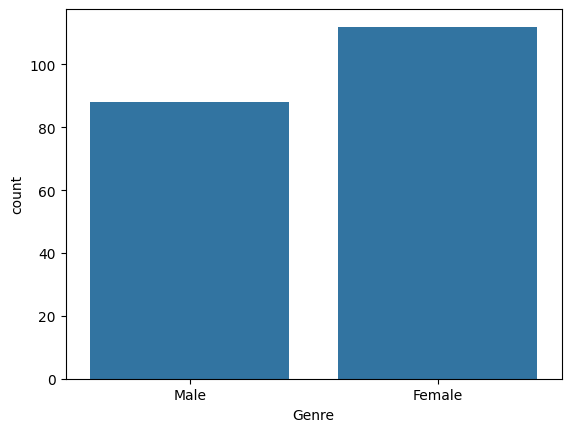

In [12]:
print(df.columns)  # Print columns to verify if 'Gender' is present

# If the column name is different (e.g., 'gender'), correct it in your code:
sns.countplot(data=df, x='Genre')  # Replace 'Gender' with the actual column name if different

# Data Preprocessing

a. Convert Gender to Numeric (Optional)

In [14]:
# Replace 'Gender' with 'Genre' in your code:
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})


b. Select Features for Clustering

In [15]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


c. Standardize the Features

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# K-Means Clustering


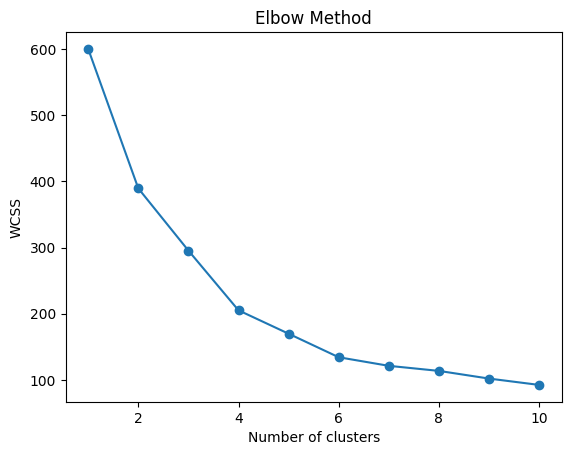

In [17]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


b. Apply K-Means with Optimal Clusters ( k=5)

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


# Visualize the Clusters

a. PCA for 2D Visualization

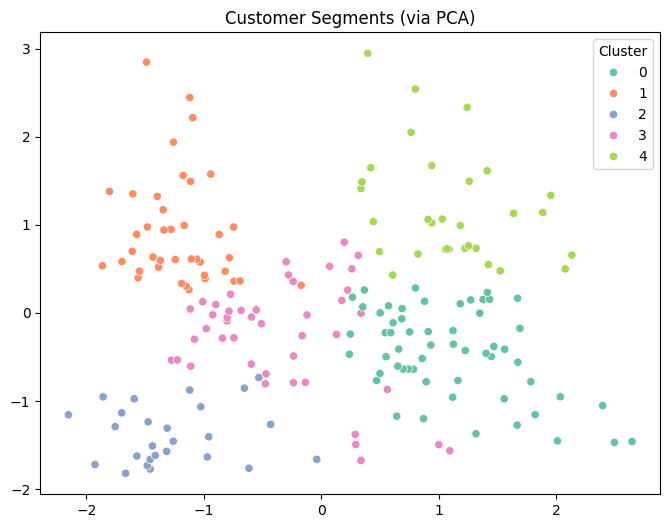

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments (via PCA)')
plt.show()


b. Pairplot by Cluster

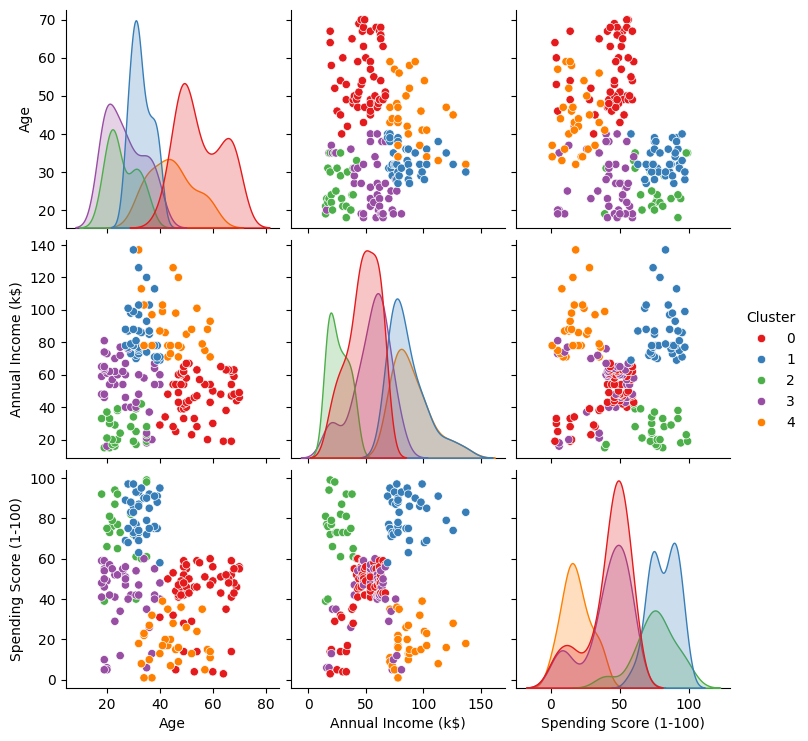

In [20]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], palette='Set1')


# Hierarchical Clustering

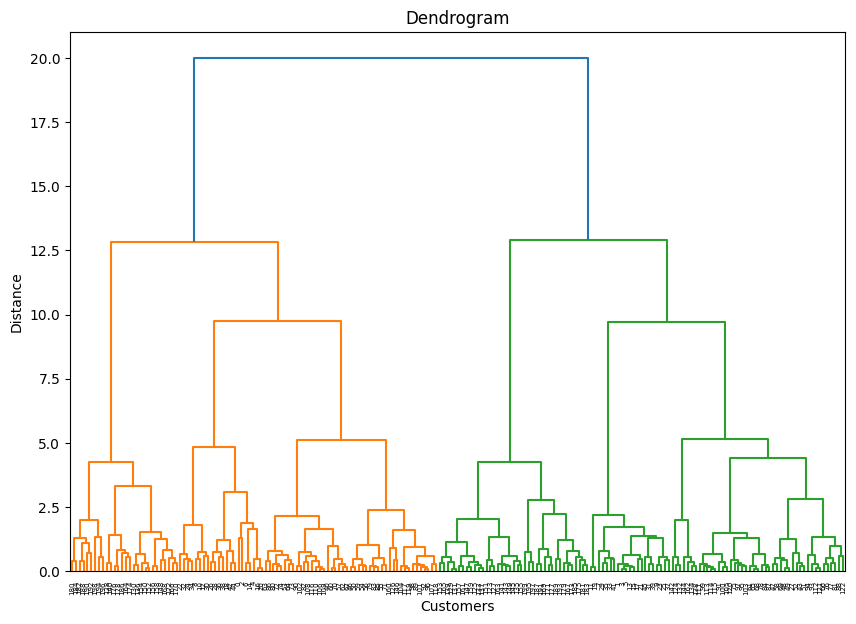

In [21]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()
